<a href="https://colab.research.google.com/github/chandrusuresh/Hands-On-ML/blob/master/Ch8-DimensionalityReduction/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Principal Component Analysis

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
img_size = np.uint16(np.sqrt(mnist["data"].shape[1]))
print(mnist.keys())
print('Size of image:',img_size)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
Size of image: 28


In [3]:
X,y = mnist["data"],mnist["target"].astype(np.uint8)
print("Shape of data:",X.shape)
print("Shape of target:",y.shape)

X_train,y_train,X_test,y_test = X[:60000,:],y[:60000],X[60000:,:],y[60000:]

Shape of data: (70000, 784)
Shape of target: (70000,)


### Visualize MNIST

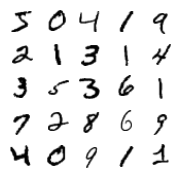

In [4]:
nRows = 5
fig,ax = plt.subplots(nRows,nRows,figsize=(3,3))
# fig.tight_layout(pad=0.001)
for i in range(nRows):
  for j in range(nRows):
    c = i*nRows + j
    ax[i][j].imshow(X[c].reshape(img_size,img_size),cmap='binary')
    ax[i][j].axis('off')
    # ax[i][j].set_title(str(y[c]))

### Apply **Full** PCA to MNIST

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
Xtrain_reduced = pca.fit_transform(X_train)
print('Reduced Dimensions with full PCA:',Xtrain_reduced.shape[1])

X_full = pca.inverse_transform(Xtrain_reduced)

Reduced Dimensions with full PCA: 154


### Apply **Randomized** PCA to MNIST

In [6]:
pca_random = PCA(n_components=Xtrain_reduced.shape[1],svd_solver="randomized")
Xtrain_random_reduced = pca_random.fit_transform(X_train)
print('Reduced Dimensions with randomized PCA:',Xtrain_random_reduced.shape[1])

X_random = pca_random.inverse_transform(Xtrain_random_reduced)

Reduced Dimensions with randomized PCA: 154


### Apply **Incremental** PCA to MNIST

In [8]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=Xtrain_reduced.shape[1])
for X_batch in np.array_split(X_train,n_batches):
  inc_pca.partial_fit(X_batch)
X_ipca_reduced = inc_pca.transform(X_train)
print('Reduced Dimensions with incremental PCA:',X_ipca_reduced.shape[1])

X_ipca = inc_pca.inverse_transform(X_ipca_reduced)

Reduced Dimensions with incremental PCA: 154


## Reconstruct data

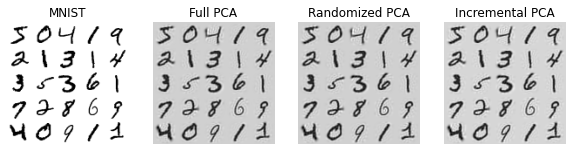

In [13]:
data = [X_train,X_full,X_random,X_ipca]
titles = ['MNIST','Full PCA','Randomized PCA','Incremental PCA']
fig,ax = plt.subplots(1,len(data),figsize=(10,10))
for k in range(len(data)):
  Xp = data[k]
  mat = None
  for i in range(nRows):
    matc = None
    for j in range(nRows):
      c = i*nRows + j
      if matc is None:
        matc = Xp[c].reshape(img_size,img_size)
      else:
        matc = np.c_[matc,Xp[c].reshape(img_size,img_size)]
    if mat is None:
      mat = matc
    else:
      mat = np.r_[mat,matc]
  ax[k].imshow(mat,cmap='binary')
  ax[k].axis('off')
  ax[k].set_title(titles[k])

Kernel PCA with Swiss Roll Dataset

In [35]:
from sklearn.datasets import make_swiss_roll
X, color = make_swiss_roll(n_samples=1500,random_state=42)

In [36]:
from sklearn.decomposition import KernelPCA

lin_pca = PCA(n_components=2)#,kernel="rbf",gamma=0.04)
X_lin_reduced = lin_pca.fit_transform(X)

rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
X_rbf_reduced = rbf_pca.fit_transform(X)

sgm_pca = KernelPCA(n_components=2,kernel="sigmoid",gamma=0.001)
X_sgm_reduced = sgm_pca.fit_transform(X)

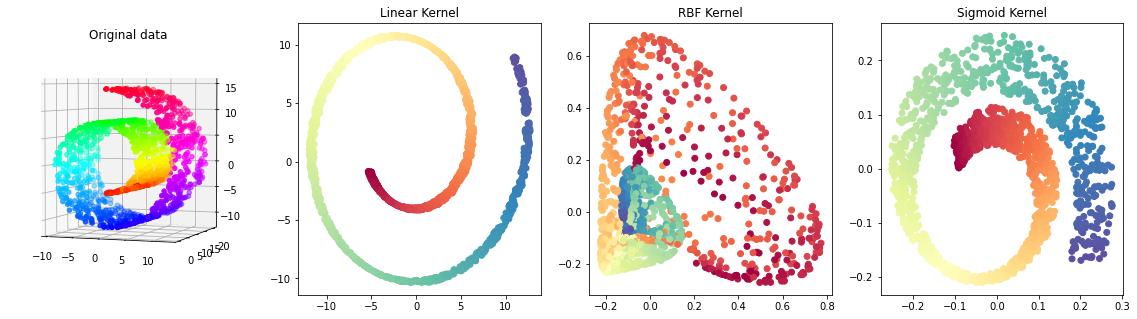

In [45]:
fig = plt.figure(figsize=(20,5))

ax0 = fig.add_subplot(141, projection='3d')
ax0.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.hsv)
ax0.set_title("Original data")
ax0.view_init(3,-70)

ax1 = fig.add_subplot(142)
ax1.scatter(X_lin_reduced[:, 0], X_lin_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
ax1.axis('tight')
# ax1.set_xticks([]), plt.yticks([])
ax1.set_title('Linear Kernel')

ax2 = fig.add_subplot(143)
ax2.scatter(X_rbf_reduced[:, 0], X_rbf_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.axis('tight')
# ax2.xticks([]), plt.yticks([])
ax2.set_title('RBF Kernel')

ax3 = fig.add_subplot(144)
ax3.scatter(X_sgm_reduced[:, 0], X_sgm_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
ax3.axis('tight')
# ax3.xticks([]), plt.yticks([])
ax3.set_title('Sigmoid Kernel');

## Reconstruction using KernelPCA
Note that, in Kernel PCA, the application of the Kernel makes it hard to reconstruct the original image because of the non-linear transformation applied by the kernel.

PCA Reconstruction Error: 33.388822630768836


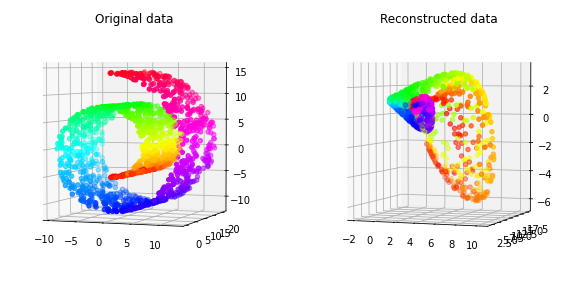

In [48]:
rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.0433,fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

fig = plt.figure(figsize=(10,5))

ax0 = fig.add_subplot(121, projection='3d')
ax0.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.hsv)
ax0.set_title("Original data")
ax0.view_init(3,-70)

ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(X_preimage[:, 0], X_preimage[:, 1], X_preimage[:, 2], c=color, cmap=plt.cm.hsv)
ax1.set_title("Reconstructed data")
ax1.view_init(3,-70)

from sklearn.metrics import mean_squared_error
print("PCA Reconstruction Error:", mean_squared_error(X,X_preimage))